<a href="https://colab.research.google.com/github/rameez16/Hubdemo/blob/main/Cardio_Vascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Summary -**

This project focuses on predicting the ten-year risk of developing Coronary Heart Disease (CHD) using demographic, behavioral, and clinical data. The dataset includes 17 key variables such as age, BMI, blood pressure readings, cholesterol levels, smoking habits, and medical history (e.g., diabetes, hypertension, prior stroke). Using statistical analysis, correlation studies, and preprocessing steps like handling missing values and encoding categorical variables, we built robust classification models including Logistic Regression, Random Forest, and Gradient Boosting. The goal was to provide accurate risk predictions that can assist healthcare professionals in early intervention and personalized treatment planning. Performance metrics such as precision, recall, and ROC-AUC were used to evaluate model effectiveness. This predictive solution can play a vital role in preventive cardiology and population health management.

✅ Early Detection Saves Lives
Predicting 10-year CHD risk enables timely medical intervention, potentially preventing heart attacks and saving lives.

💰 Cost-Effective Preventive Care
Accurate predictions reduce unnecessary tests and hospitalizations, optimizing healthcare resources and cutting costs.

⚕️ Personalized Health Planning
Helps doctors tailor treatment and lifestyle recommendations based on individual risk profiles.

📈 Data-Driven Decisions in Healthcare
Promotes AI integration into clinical practice, leading to smarter, more efficient medical decision-making.

🧪 Real-World Dataset Usage

![Sunset](https://blogs.biomedcentral.com/on-medicine/wp-content/uploads/sites/6/2015/09/heart.jpg)

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Coronary Heart Disease (CHD) remains one of the leading causes of mortality worldwide. Early identification of individuals at high risk of developing CHD is crucial for timely preventive intervention and reducing long-term healthcare costs. The objective of this project is to develop a predictive model that can accurately assess a person’s risk of experiencing CHD within the next ten years based on clinical, demographic, and lifestyle factors. By leveraging machine learning techniques on structured medical data, we aim to support healthcare providers in making data-driven decisions for risk stratification and personalized care planning.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv('/content/drive/MyDrive/Copy of data_cardiovascular_risk.csv')






Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
df.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
id,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0


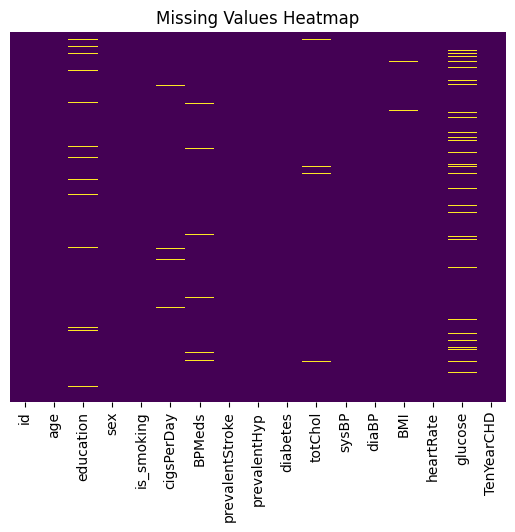

In [ ]:
# Visualizing the missing values
df[df.isnull().any(axis=1)]
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
df.isnull().sum().sum()

np.int64(510)

What you know about ur data?


---



Data set has 3390 rows × 17 columns.
Data has No duplicate records.
Has 510 missing entries.
Column with msissing entries -

education: 87 missing

cigsPerDay: 22 missing

BPMeds: 44 missing

totChol: 38 missing

BMI: 14 missing

heartRate: 1 missing


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description



###  Numerical Variables

| Column        | Description |
|---------------|-------------|
| **id**         | Unique identifier |
| **age**        | Age of the person (likely in years). |
| **education**  | Education level (categorical but stored as float, e.g., 1 = low, 4 = high). |
| **cigsPerDay** | Average number of cigarettes smoked per day. |
| **BPMeds**     | Whether the person is on blood pressure medication (0 = No, 1 = Yes). |
| **totChol**    | Total cholesterol level (mg/dL). |
| **sysBP**      | Systolic blood pressure (mm Hg). |
| **diaBP**      | Diastolic blood pressure (mm Hg). |
| **BMI**        | Body Mass Index. |
| **heartRate**  | Resting heart rate (beats per minute). |
| **glucose**    | Glucose level (mg/dL). |

---

###  Categorical / Binary Variables

| Column              | Description |
|---------------------|-------------|
| **sex**             | Gender (`M` or `F`). |
| **is_smoking**      | Whether the person currently smokes (`YES` or `NO`). |
| **prevalentStroke** | History of stroke (0 = No, 1 = Yes). |
| **prevalentHyp**    | History of hypertension (0 = No, 1 = Yes). |
| **diabetes**        | Diabetes status (0 = No, 1 = Yes). |
| **TenYearCHD**      | **Target variable** — whether the person is likely to develop coronary heart disease (CHD) within 10 years (0 = No, 1 = Yes). |

---

### 🎯 Target Variable

- **`TenYearCHD`** is the primary outcome. The goal is to predict whether a person will develop **coronary heart disease** in the next 10 years based on other risk factors.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
uniqu_values=df.nunique().sort_values(ascending=False)
uniqu_values


,0
id,3390
BMI,1259
totChol,240
sysBP,226
diaBP,142
glucose,132
heartRate,68
age,39
cigsPerDay,32
education,4


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Columns to focus on
selected_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP',
                    'diaBP', 'BMI', 'heartRate', 'glucose']

# Group by 'TenYearCHD' (0 = No Risk, 1 = Risk) and calculate the mean
group_means = df.groupby('TenYearCHD')[selected_columns].mean()
group_means
# Calculate the difference: Risk - No Risk
mean_difference = group_means.loc[1] - group_means.loc[0]

# Combine all into one table
summary = pd.DataFrame({
    'No Risk Mean': group_means.loc[0],
    'Risk Mean': group_means.loc[1],
    'Difference (Risk - No Risk)': mean_difference
})

# Optional: round values for readability
summary = summary.round(2)

# Show the table
print(summary)
group_means

            No Risk Mean  Risk Mean  Difference (Risk - No Risk)
age                48.73      54.13                         5.40
cigsPerDay          8.73      10.95                         2.21
totChol           235.28     247.22                        11.94
sysBP             130.60     143.85                        13.25
diaBP              82.19      86.76                         4.57
BMI                25.68      26.45                         0.77
heartRate          75.88      76.55                         0.68
glucose            80.66      89.97                         9.31


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,
0,48.728031,8.734430,235.279494,130.603856,82.194338,25.679565,75.875304,80.662969
1,54.129159,10.947059,247.216270,143.854207,86.763209,26.452560,76.552941,89.970339


In [ ]:
df.isnull().sum()
df.shape

(3390, 17)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
df.describe().columns

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

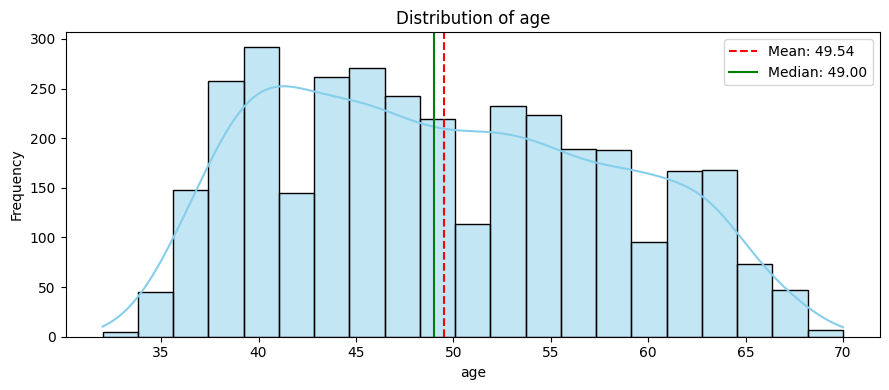

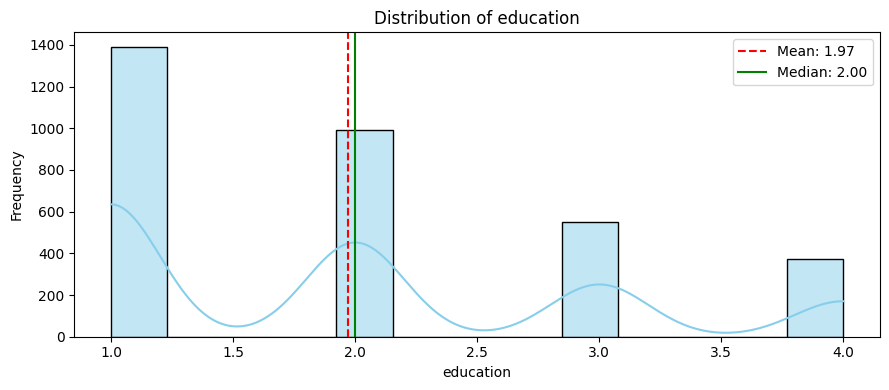

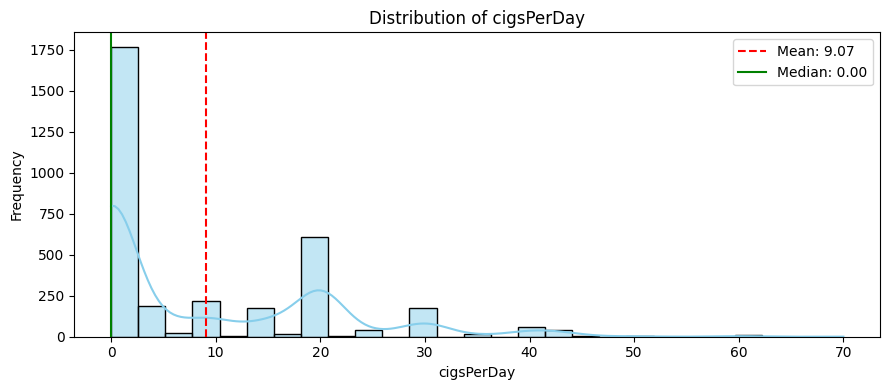

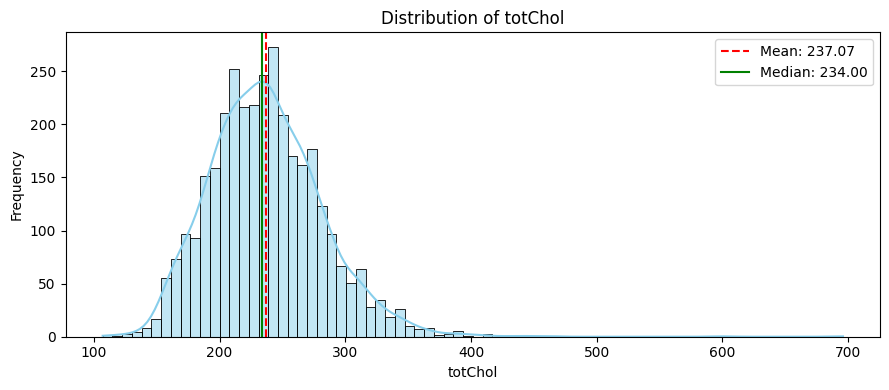

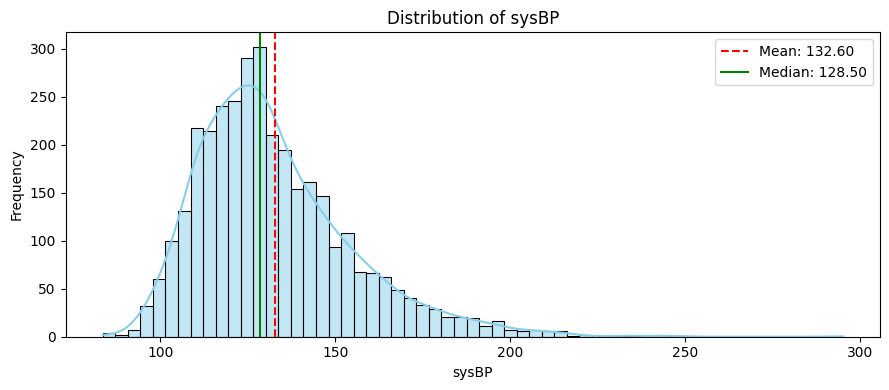

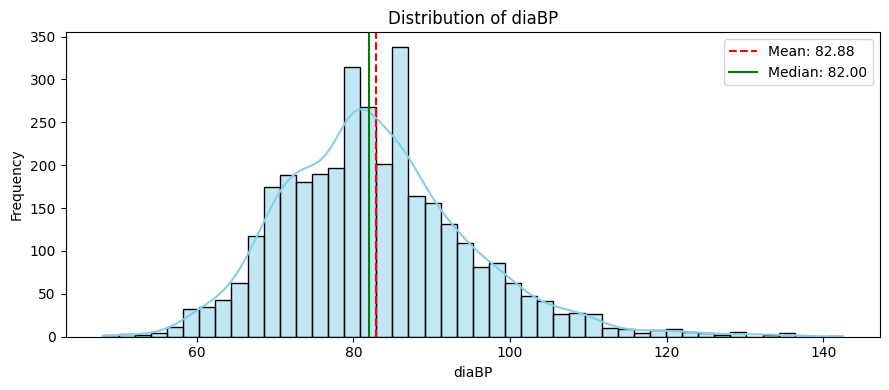

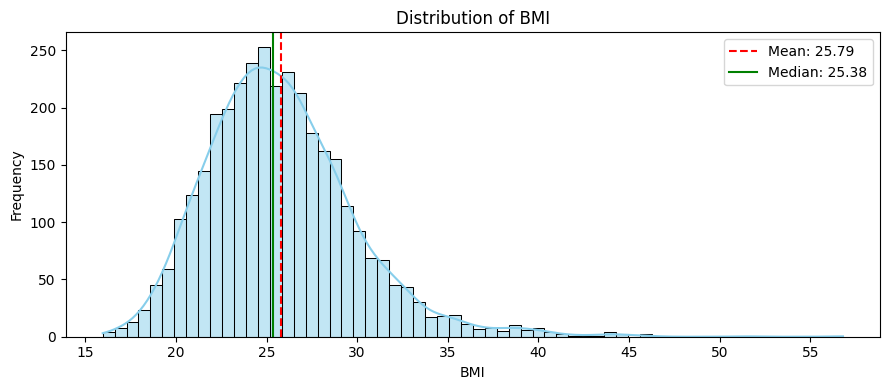

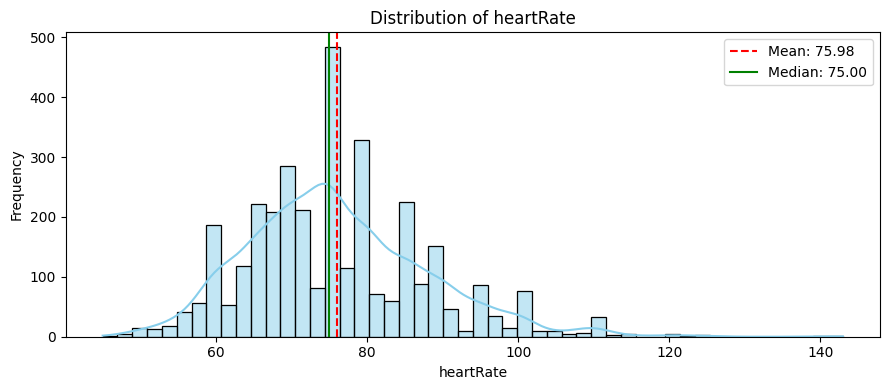

In [ ]:
# Chart - 1 visualization code
def plot_histograms_with_kde(dataframe):

     # Drop 'id' column if present

    num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Keep only columns with more than two unique values (i.e., not binary)
    num_cols = [col for col in num_cols if df[col].nunique() > 2]

    for col in num_cols[1:-1]:
        plt.figure(figsize=(9, 4))
        sns.histplot(dataframe[col].dropna(), kde=True, color='skyblue', edgecolor='black')
        plt.axvline(dataframe[col].mean(), color='red', linestyle='--', label=f"Mean: {dataframe[col].mean():.2f}")
        plt.axvline(dataframe[col].median(), color='green', linestyle='-', label=f"Median: {dataframe[col].median():.2f}")
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.tight_layout()
        plt.show()

plot_histograms_with_kde(df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

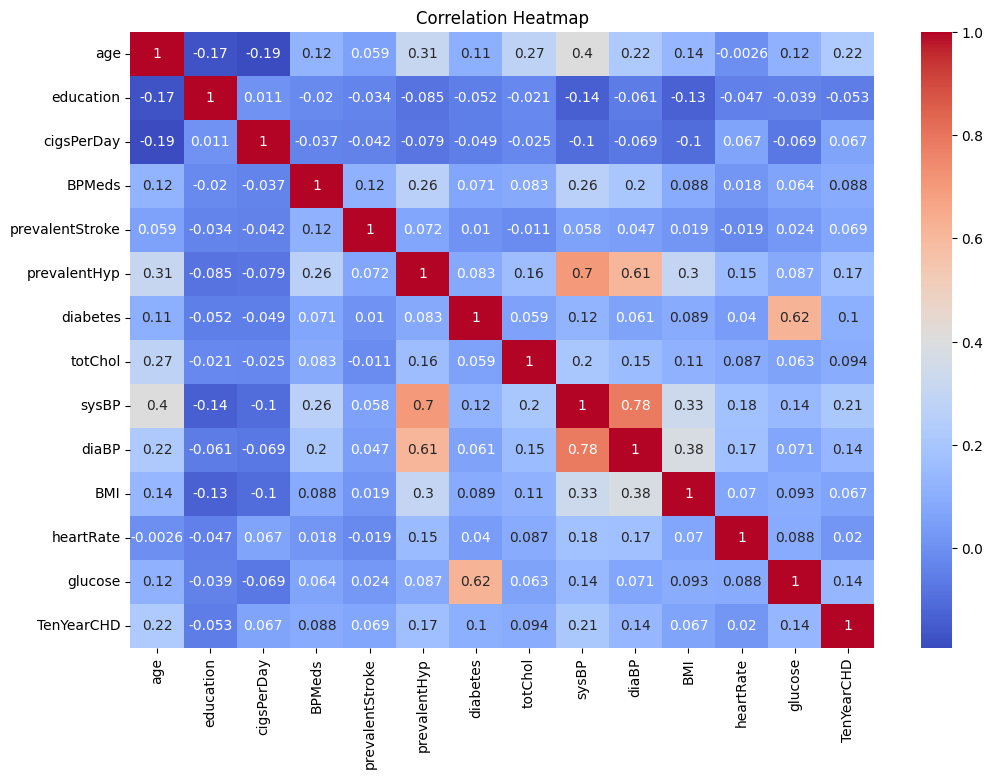

In [ ]:
# Chart - 2 visualization code
df.columns
df_numerical = df[['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD']]

plt.figure(figsize=(12,8))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

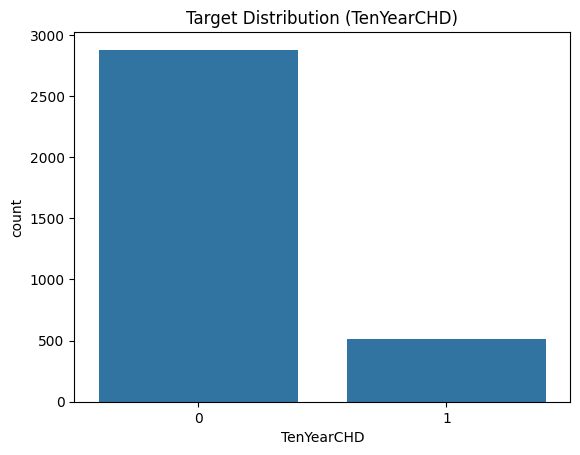

In [ ]:
sns.countplot(x='TenYearCHD', data=df_numerical)
plt.title('Target Distribution (TenYearCHD)')
plt.show()

In [ ]:
# Chart - 3 visualization code

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Answer Here

#### Chart - 4

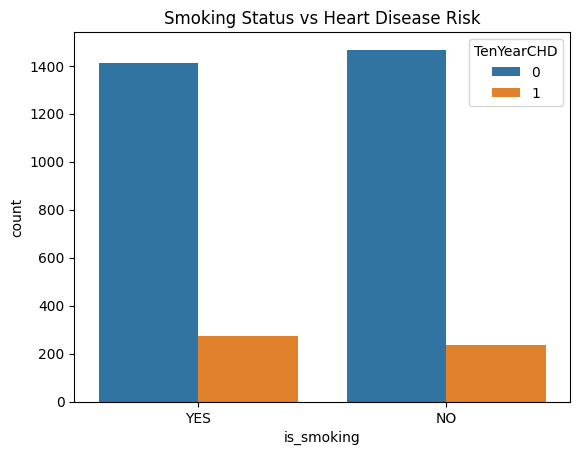

In [ ]:
sns.countplot(x='is_smoking', hue='TenYearCHD', data=df)
plt.title('Smoking Status vs Heart Disease Risk')
plt.show()

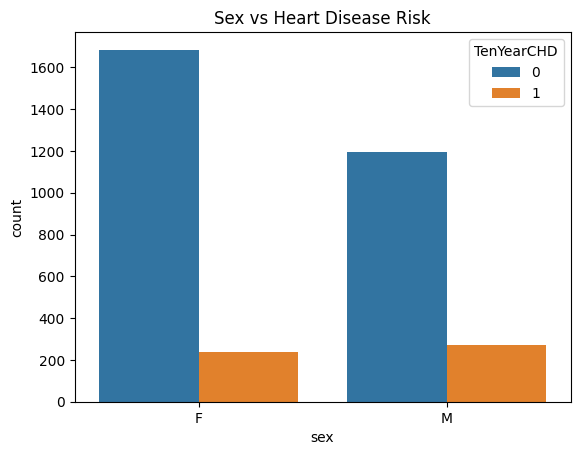

In [ ]:
# Chart - 4 visualization code
sns.countplot(x='sex', hue='TenYearCHD', data=df)
plt.title('Sex vs Heart Disease Risk')
plt.show()


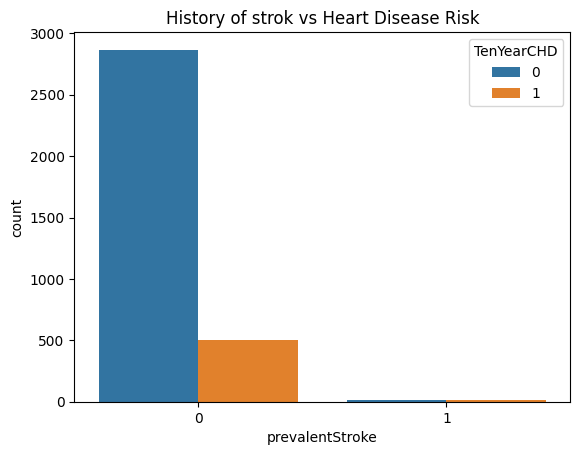

In [ ]:
sns.countplot(x='prevalentStroke', hue='TenYearCHD', data=df)
plt.title('History of strok vs Heart Disease Risk')
plt.show()

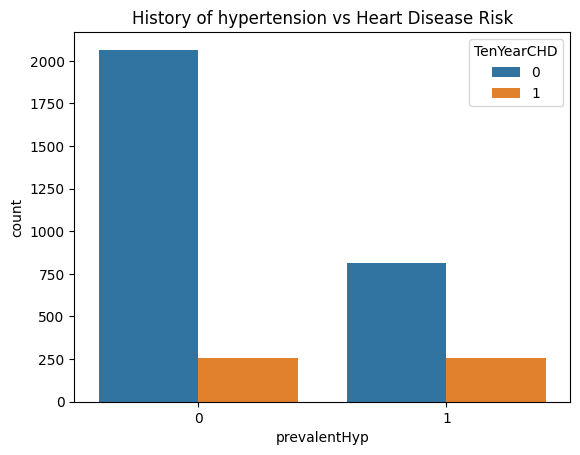

In [ ]:
sns.countplot(x='prevalentHyp', hue='TenYearCHD', data=df)
plt.title('History of hypertension vs Heart Disease Risk')
plt.show()

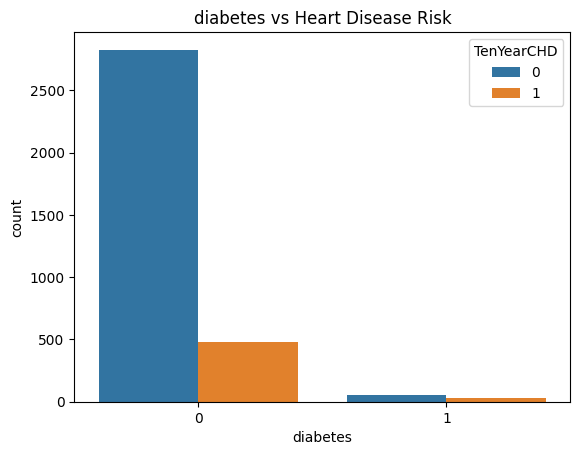

In [ ]:
sns.countplot(x='diabetes', hue='TenYearCHD', data=df)
plt.title('diabetes vs Heart Disease Risk')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

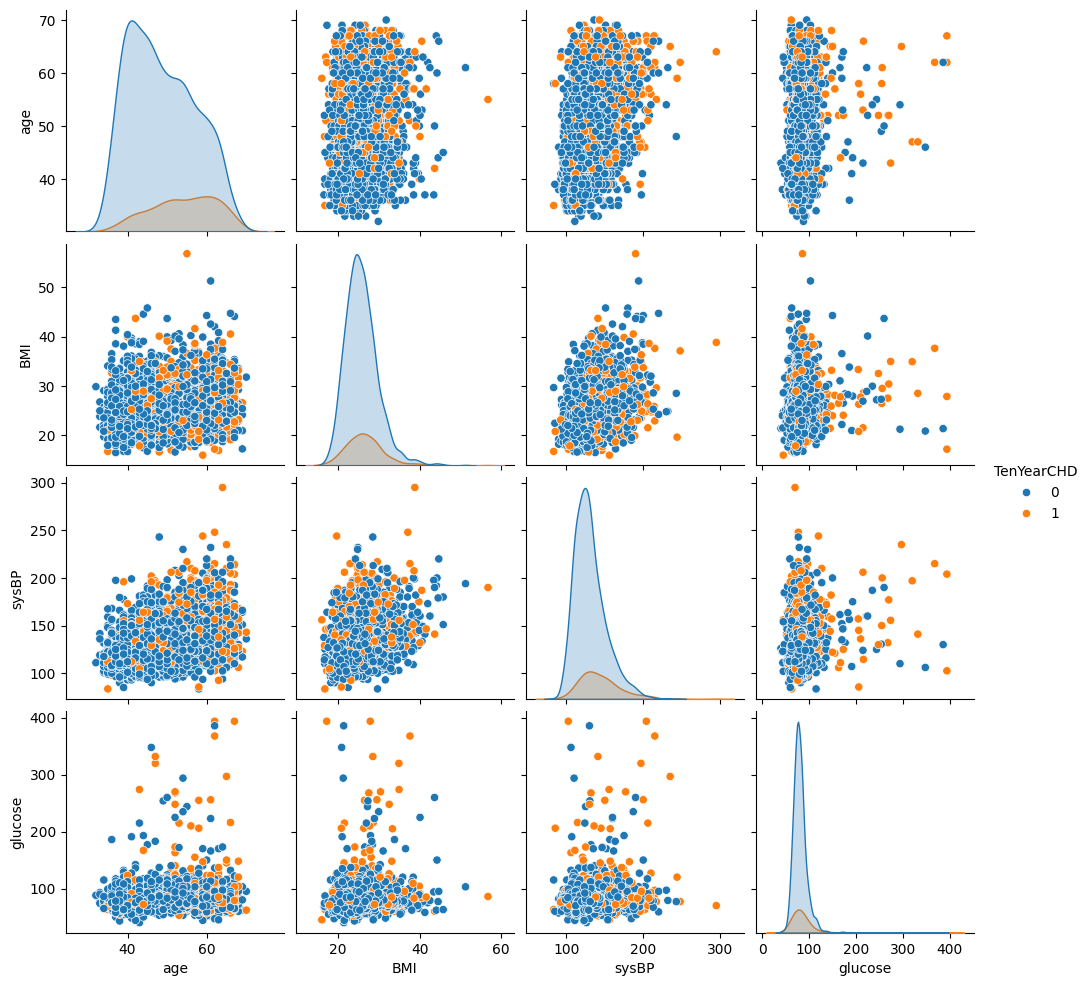

In [ ]:
# Chart - 5 visualization code
sns.pairplot(df[['age', 'BMI', 'sysBP', 'glucose', 'TenYearCHD']], hue='TenYearCHD')
plt.show()

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Answer Here

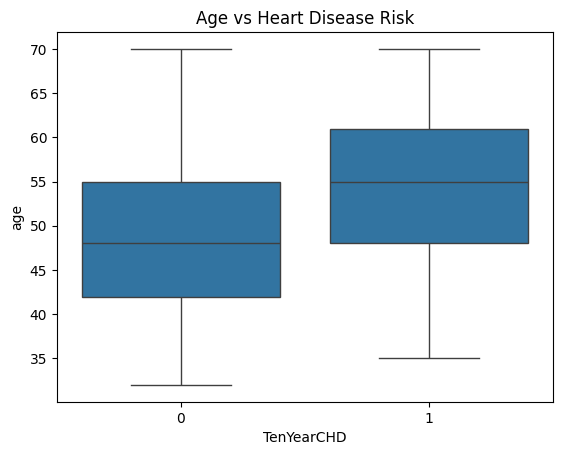

In [ ]:
sns.boxplot(x='TenYearCHD', y='age', data=df)
plt.title('Age vs Heart Disease Risk')
plt.show()

#### Chart - 6

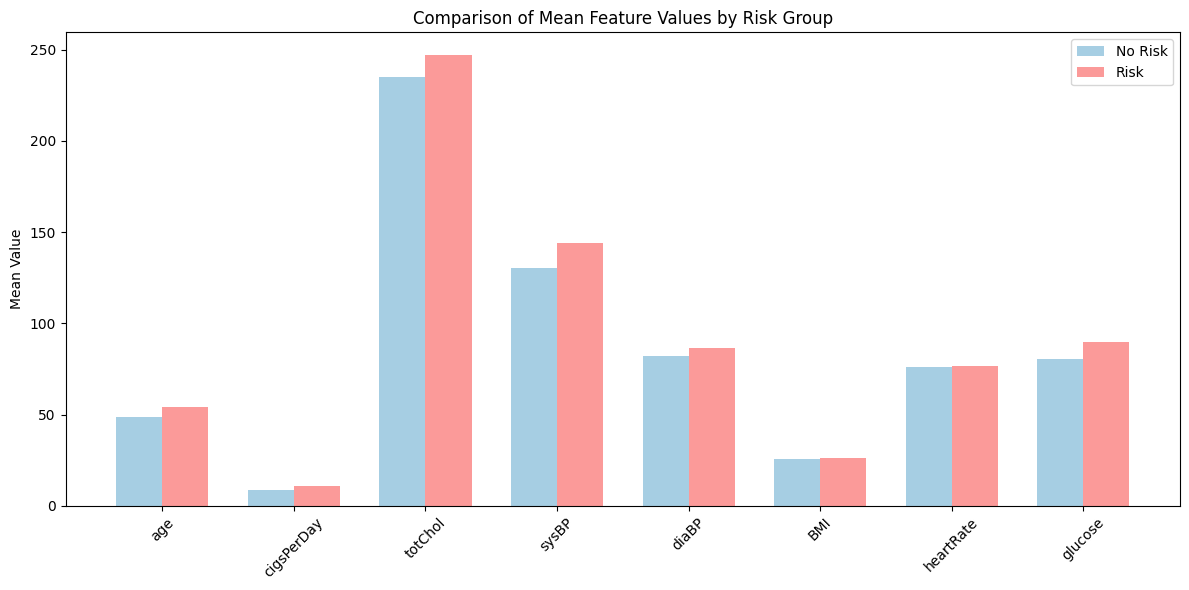

In [ ]:
# Transpose for easier plotting
group_means = group_means.T  # Now rows = features, columns = 0 (No Risk), 1 (Risk)



# Plot side-by-side bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Define positions
x = range(len(group_means))
width = 0.35

# Bar chart for each group
ax.bar([i - width/2 for i in x], group_means[0], width=width, label='No Risk', color='#A6CEE3')
ax.bar([i + width/2 for i in x], group_means[1], width=width, label='Risk', color='#FB9A99')

# Labels and formatting
ax.set_xticks(x)
ax.set_xticklabels(group_means.index, rotation=45)
ax.set_ylabel('Mean Value')
ax.set_title('Comparison of Mean Feature Values by Risk Group')
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


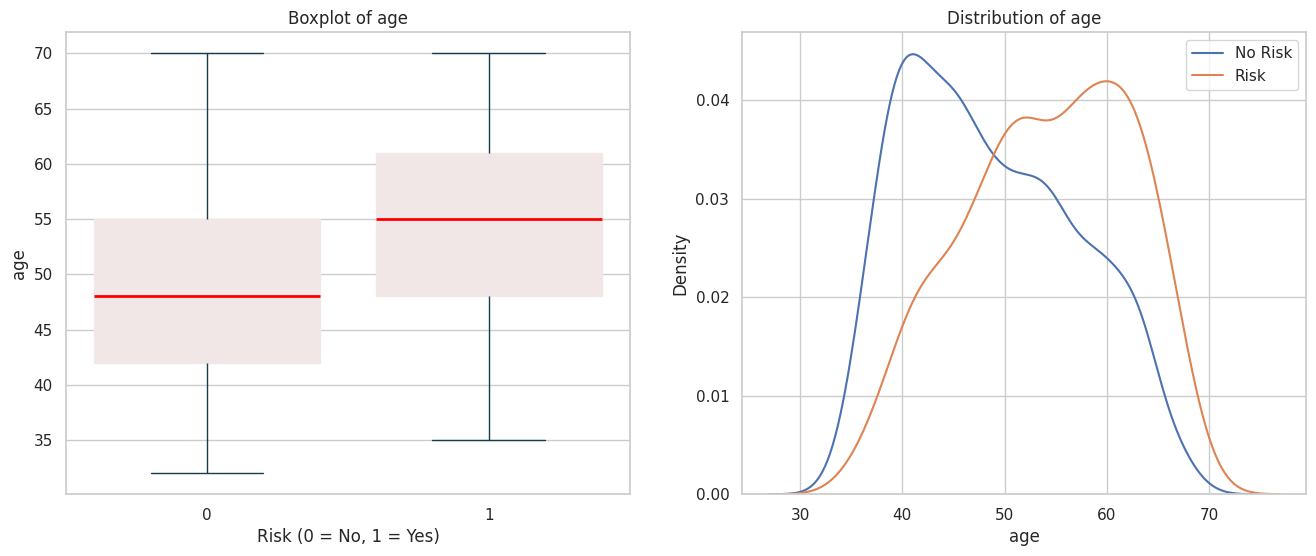

<Figure size 30x30 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


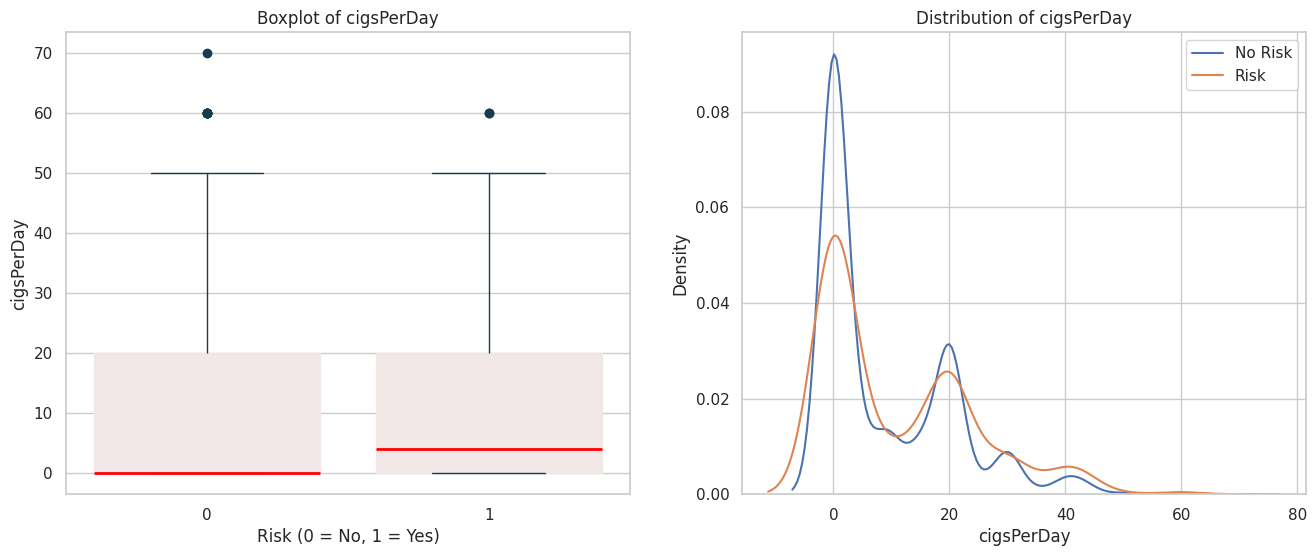

<Figure size 30x30 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


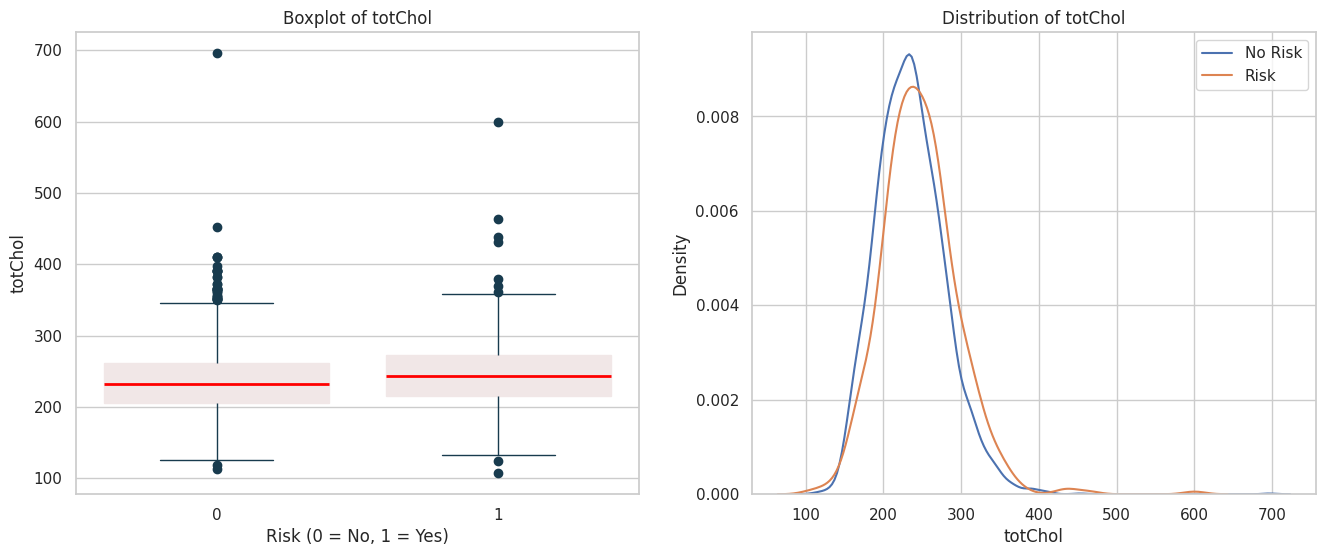

<Figure size 30x30 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


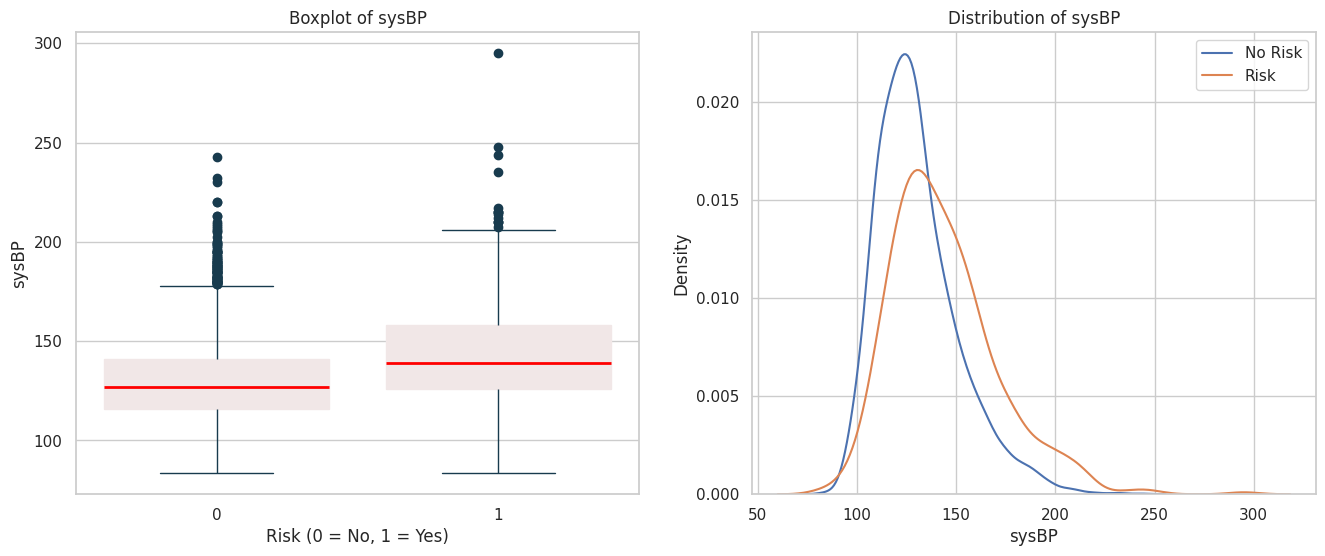

<Figure size 30x30 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


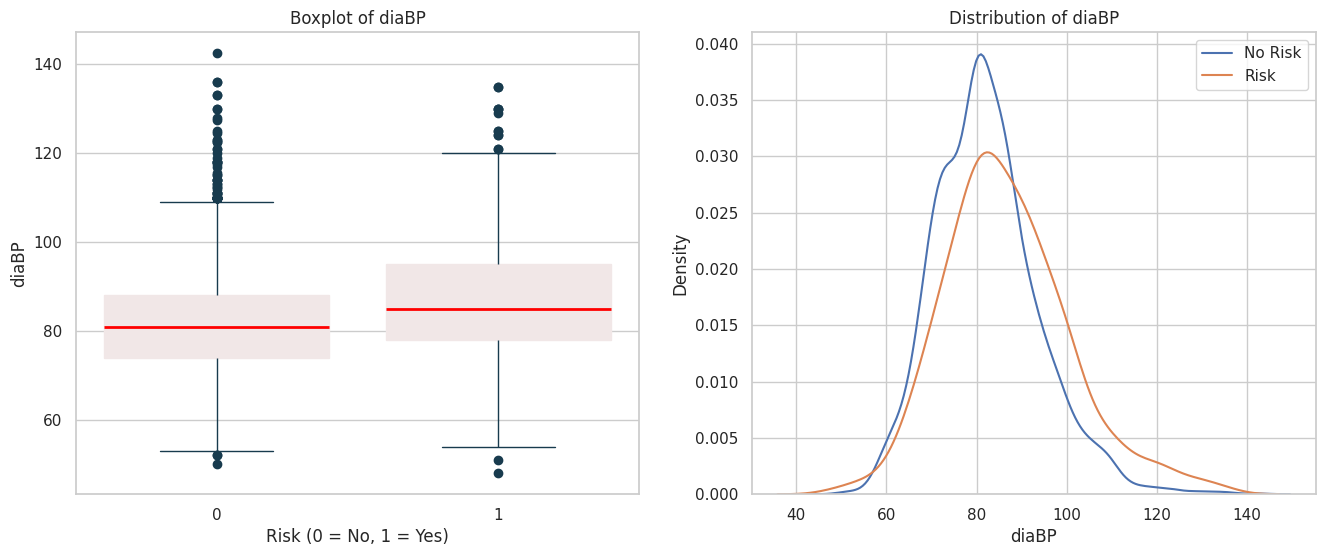

<Figure size 30x30 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


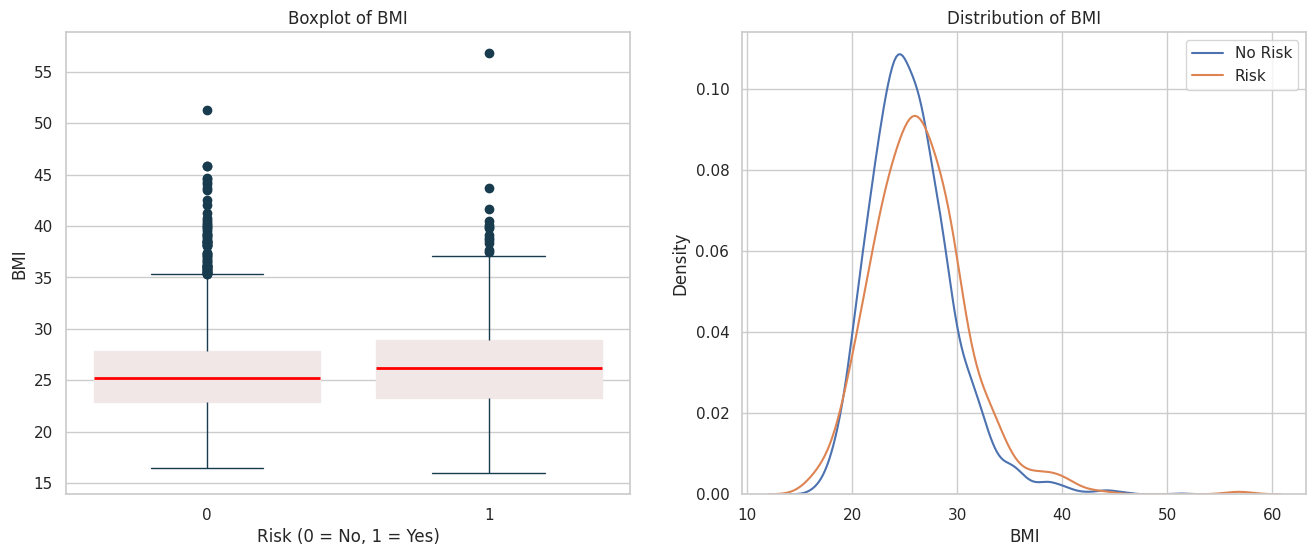

<Figure size 30x30 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


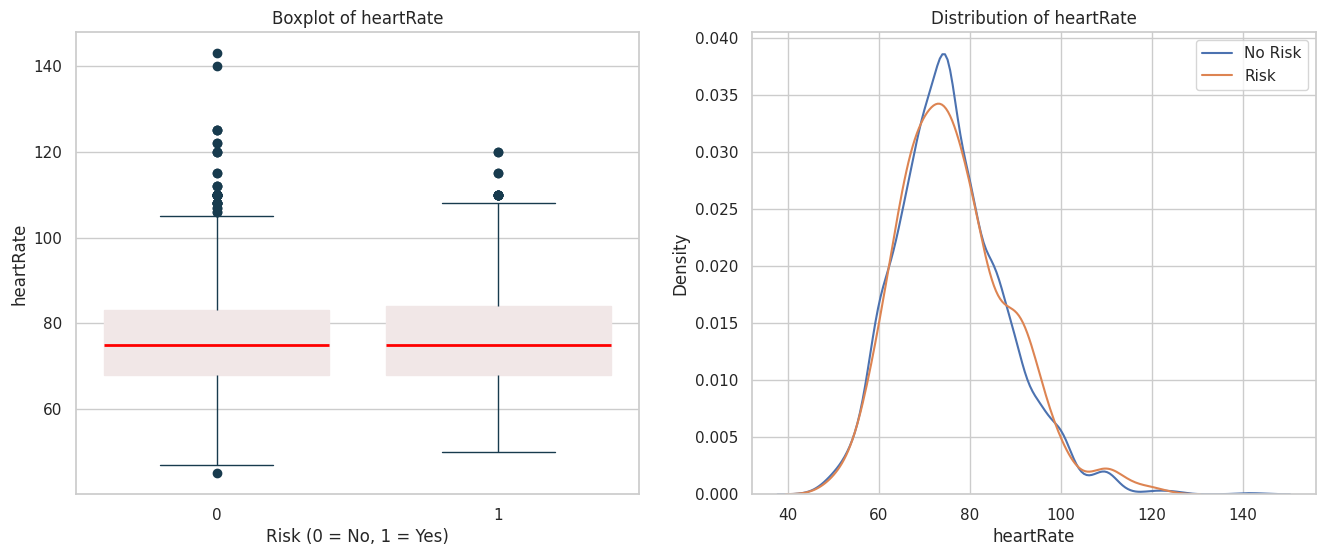

<Figure size 30x30 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


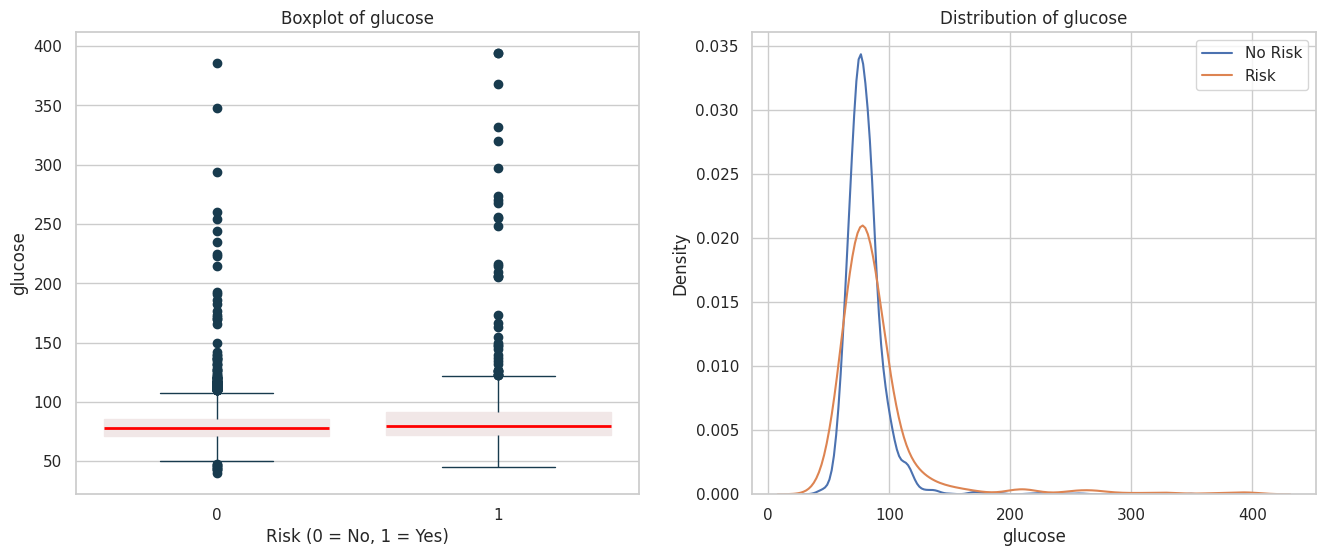

<Figure size 30x30 with 0 Axes>

In [ ]:
# Chart - 8 visualization code


features = ['age', 'cigsPerDay', 'totChol', 'sysBP',
            'diaBP', 'BMI', 'heartRate', 'glucose']

sns.set(style='whitegrid')

for item in features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Boxplot with customized styling
    sns.boxplot(
        x='TenYearCHD',
        y=item,
        data=df,
        ax=axes[0],
        color='#F4F8D3',
        medianprops=dict(color='red', linewidth=2),
        boxprops=dict(color='#F1E7E7'),
        whiskerprops=dict(color='#183B4E'),
        capprops=dict(color='#183B4E'),
        flierprops=dict(markerfacecolor='#183B4E', markeredgecolor='#183B4E')
    )
    axes[0].set_title(f'Boxplot of {item}')
    axes[0].set_xlabel('Risk (0 = No, 1 = Yes)')
    axes[0].set_ylabel(item)

    # KDE Plot
    sns.kdeplot(df[df['TenYearCHD'] == 0][item], label='No Risk', ax=axes[1], fill=False)
    sns.kdeplot(df[df['TenYearCHD'] == 1][item], label='Risk', ax=axes[1], fill=False)
    axes[1].set_title(f'Distribution of {item}')
    axes[1].set_xlabel(item)
    axes[1].set_ylabel('Density')
    axes[1].legend()

    # Optional spacer
    spacer = plt.figure(figsize=(0.3, 0.3))

    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

📊 Interpretation of Age vs. CHD Risk
Left Plot: Boxplot
Shows distribution of age for those with and without TenYearCHD risk.

🟥 The median (red line) for high-risk individuals is higher.

People with CHD risk (1) are generally older than those without (0).

The spread is wider in the non-risk group.

Right Plot: KDE (Density Plot)
The blue curve (No Risk) peaks around 40–45 years.

The orange curve (Risk) peaks around 55–60 years.

This confirms the boxplot — risk of CHD increases with age.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df_logistics = df.dropna().copy()
df_logistics.shape

(2927, 17)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:

# Convert binary categorical features (e.g., sex, is_smoking) to 0/1
df_logistics['sex'] = df_logistics['sex'].map({'M': 1, 'F': 0})  # Example for binary encoding
df_logistics['is_smoking'] = df_logistics['is_smoking'].map({'YES': 1, 'NO': 0})

df_logistics.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
X = df_logistics.drop(['TenYearCHD', 'id'], axis=1)  # Drop non-predictive columns
y = df_logistics['TenYearCHD']

df_logistics

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,3384,61,1.0,0,0,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


In [ ]:
x=df

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
X[num_features] = scaler.fit_transform(X[num_features])

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test.shape

(879, 15)

##### What data splitting ratio have you used and why?

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
model = LogisticRegression()  # Increase max_iter for convergence
# Fit the Algorithm
model.fit(X_train, y_train)
# Predict on the model
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score,
    classification_report,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score
)

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_probs),
    'Average Precision': average_precision_score(y_test, y_probs)
}

pd.DataFrame(metrics.items(), columns=['Metric', 'Value']).style.background_gradient(cmap='Blues')

,Metric,Value
0,Accuracy,0.847554
1,Precision,0.785714
2,Recall,0.077465
3,F1-Score,0.141026
4,ROC-AUC,0.743660
5,Average Precision,0.399644


###  Model Evaluation Metrics Summary

| **Metric**              | **Value** | **Interpretation** |
|-------------------------|-----------|--------------------|
| **Accuracy**            | 0.848     | The model predicts correctly **84.8%** of the time overall.|
| **Precision**           | 0.786     | Out of all predicted positive cases (CHD risk), **78.6% were actually correct**. High precision means **few false positives**.  |
| **Recall (Sensitivity)**| 0.077     | Out of all actual positive cases, the model **only found 7.7%** of them.  Very low — indicates **many false negatives**. |
| **F1 Score**            | 0.141     | The **harmonic mean of precision and recall**. Low due to the very low recall. |


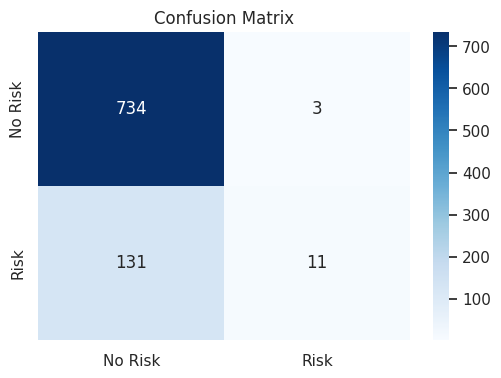

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Risk', 'Risk'],
            yticklabels=['No Risk', 'Risk'])
plt.title('Confusion Matrix')
plt.show()

###  Confusion Matrix Interpretation: Cardiovascular Risk Prediction

### ✅ True Negatives (734 Cases)
The model accurately predicted **'No Risk'** for **734 individuals** who truly did not have cardiovascular risk.

>  indicates strong performance in identifying non-risk cases.



#### ❌ False Positives (3 Cases)
The model incorrectly predicted **'Risk'** for **3 individuals** who were actually **not at risk**.

>  minor misclassifications where the model was overly cautious.


#### ❌ False Negatives (131 Cases)
The model predicted **'No Risk'** for **131 individuals** who were actually **at risk**.

> significant concern. False negatives in medical predictions can lead to missed diagnoses, delaying necessary interventions.



#### ✅ True Positives (11 Cases)
The model correctly identified **11 individuals** who truly had **cardiovascular risk**.

> Although accurate, this number is relatively low, highlighting potential limitations in detecting high-risk cases.

---

###  Overall Evaluation

- The model performs well in classifying **non-risk individuals**.
- However, it demonstrates limited effectiveness in identifying individuals who **are at risk**.
- Only **11 out of 142** actual risk cases were correctly identified, suggesting a need for further model refinement or threshold adjustment to improve **recall** on the positive class.

---

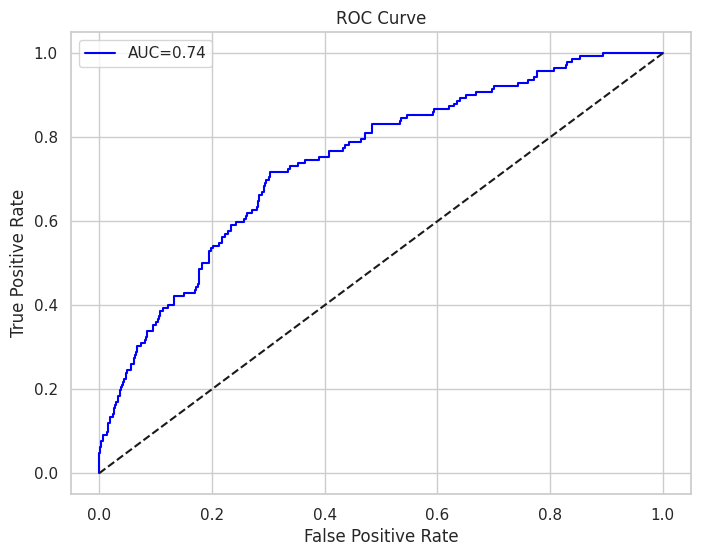

In [ ]:
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC={auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


 * model is decent at telling Risk apart from No Risk in general (ROC AUC = 0.74).ROC-AUC: A score > 0.7 indicates decent model performance.

 * But it’s struggling to actually detect Risk at the current threshold (e.g. 0.5)

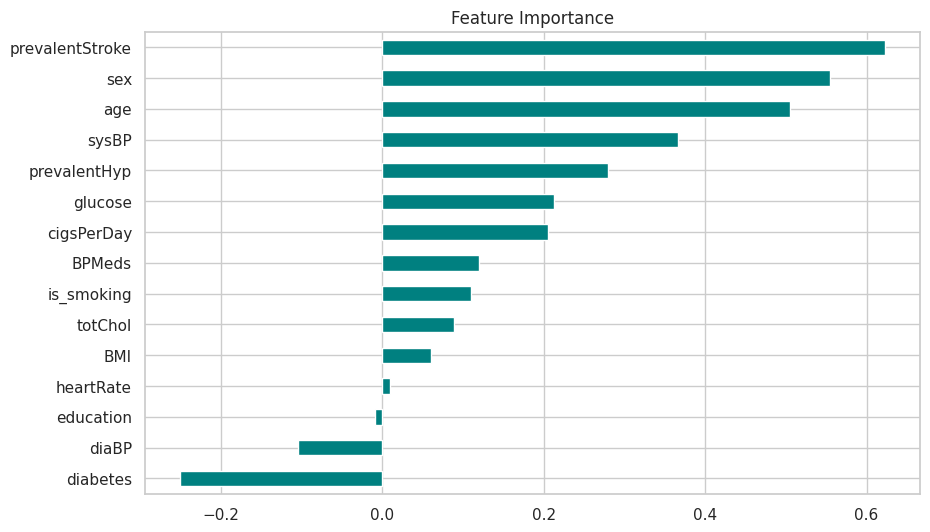

In [ ]:
# 4. Feature Importance
coefs = pd.Series(model.coef_[0], index=X.columns)
plt.figure(figsize=(10, 6))
coefs.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance')
plt.show()

### Feature Importance Summary

**🔝 Most Important Features (Positive Impact on "Risk" Prediction)**  
These features increase the likelihood of predicting "Risk":

- **Prevalent Stroke** – Strongest predictor of cardiovascular risk.
- **Sex** – Gender differences influence risk.
- **Age** – Risk increases with age.
- **Systolic Blood Pressure (sysBP)** – Higher pressure raises risk.
- **Prevalent Hypertension** – Known hypertension contributes to prediction.
- **Glucose** – Elevated levels may indicate metabolic risk.

**🔽 Less Important Features (Still Relevant)**  
- **Smoking-related**: `cigsPerDay`, `is_smoking` — moderate predictors.
- **totChol**, **BMI**, **Heart Rate** — traditional health markers with lesser weight.

**⚠️ Negative or Minimal Impact Features**  
- **Diabetes**, **Diastolic BP (diaBP)** – Negatively associated with "Risk" in this model.
- **Education**, **Heart Rate** – Minimal to no predictive value.

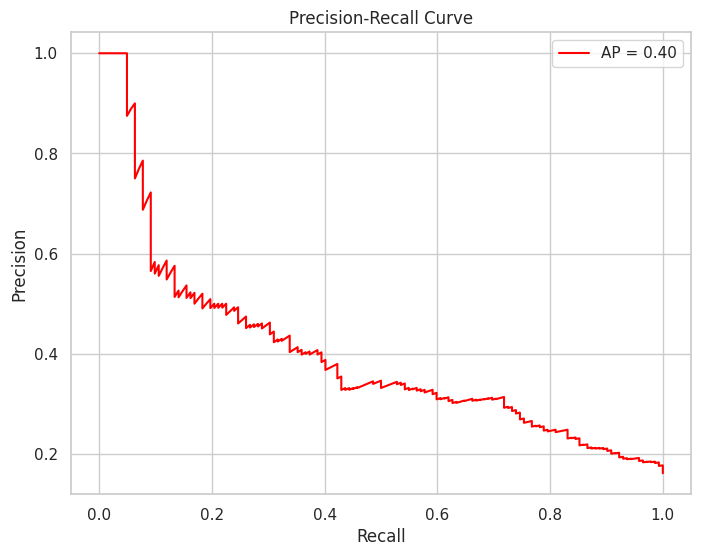

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_probs)
ap = average_precision_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {ap:.2f}', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

* Low average precision (AP = 0.40)

* Out of all the "Risk" predictions model makes, only 40% are actually correct on average.model is throwing a lot of false alarms or missing real risky cases.

* The curve drops quickly .As the model tries to catch more "Risk" cases (higher recall),
It sacrifices precision — it starts calling many "No Risk" cases as "Risk" (false positives).

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Apply SMOTE to balance the training data
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Set up logistic regression and parameters to search
model = LogisticRegression(solver='liblinear')

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Perform Grid Search
grid = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')

grid.fit(X_train_scaled, y_train_resampled)

# Predict
y_pred = grid.predict(X_test_scaled)
y_proba = grid.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print("Best Parameters:", grid.best_params_)
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Fit the Algorithm

# Predict on the model

Best Parameters: {'C': 0.1, 'penalty': 'l2'}
ROC AUC Score: 0.7352896210369407

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.68      0.78       737
           1       0.28      0.65      0.39       142

    accuracy                           0.67       879
   macro avg       0.60      0.67      0.59       879
weighted avg       0.81      0.67      0.72       879



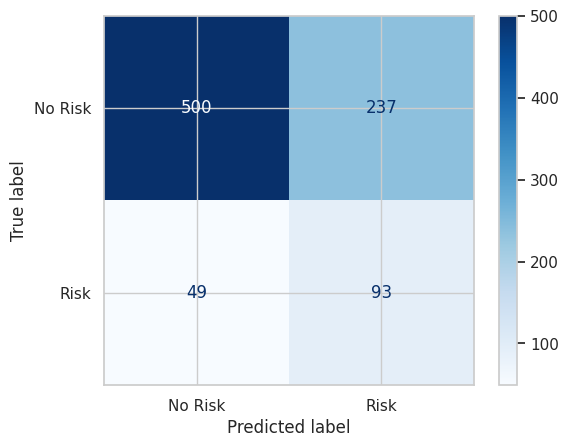

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Risk', 'Risk'])
disp.plot(cmap='Blues')

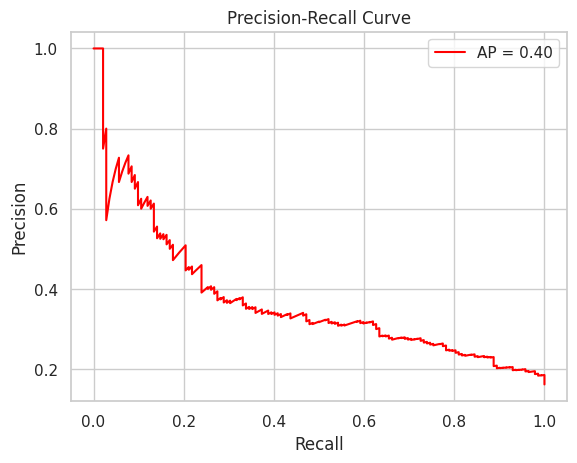

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test,y_proba)
plt.plot(recall, precision, label=f'AP = {ap:.2f}', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
df.columns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_DT = df.drop(['id', 'TenYearCHD'], axis=1)  # Features (drop ID and target)
y_DT = df['TenYearCHD']


X_DT = pd.get_dummies(X_DT, drop_first=True)

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_DT, y_DT, test_size=0.2, random_state=42
)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_dt, y_train_dt)

y_pred_dt = clf.predict(X_test_dt)

print("Accuracy:", accuracy_score(y_test_dt, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test_dt, y_pred_dt))
print("Classification Report:\n", classification_report(y_test_dt, y_pred_dt))
                       # Target
# Fit the Algorithm

# Predict on the model

Accuracy: 0.7846607669616519
Confusion Matrix:
 [[503  78]
 [ 68  29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       581
           1       0.27      0.30      0.28        97

    accuracy                           0.78       678
   macro avg       0.58      0.58      0.58       678
weighted avg       0.79      0.78      0.79       678



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

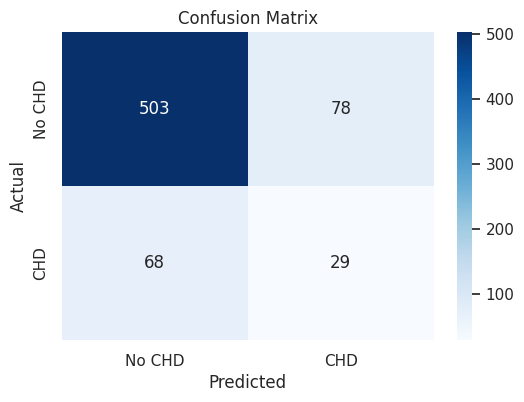

In [ ]:
# Visualizing evaluation Metric Score chart
cm_dt = confusion_matrix(y_test_dt, y_pred_dt)

# Plot it
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score,
    classification_report,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score
)

metrics_dt = {
    'Accuracy': accuracy_score(y_test_dt, y_pred_dt),
    'Precision': precision_score(y_test_dt, y_pred_dt),
    'Recall': recall_score(y_test_dt, y_pred_dt),
    'F1-Score': f1_score(y_test_dt, y_pred_dt),

}

pd.DataFrame(metrics_dt.items(), columns=['Metric', 'Value']).style.background_gradient(cmap='Blues')

,Metric,Value
0,Accuracy,0.784661
1,Precision,0.271028
2,Recall,0.298969
3,F1-Score,0.284314


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

MODAL 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Load your data (replace with your actual data loading code)
# df = pd.read_csv('your_data.csv')

# Separate features and target
X = df.drop(['id', 'TenYearCHD'], axis=1)  # Dropping ID as it's not a feature
y = df['TenYearCHD']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['education', 'sex', 'is_smoking'], drop_first=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle missing values if any (simple imputation for demonstration)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_train.mean(), inplace=True)  # Use train mean to avoid data leakage

# Create a pipeline to handle imbalance and build the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale numerical features
    ('sampling', SMOTE(sampling_strategy=0.5, random_state=42)),  # Oversample minority class
    ('undersample', RandomUnderSampler(sampling_strategy=0.8, random_state=42)),  # Undersample majority
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        class_weight='balanced_subsample',  # Adjust weights for imbalance
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': pipeline.named_steps['classifier'].feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       864
           1       0.26      0.38      0.31       153

    accuracy                           0.74      1017
   macro avg       0.57      0.59      0.57      1017
weighted avg       0.79      0.74      0.76      1017


Confusion Matrix:
[[695 169]
 [ 95  58]]

ROC AUC Score: 0.6866527475187605

Feature Importances:
            Feature  Importance
0               age    0.182936
7             sysBP    0.127780
8             diaBP    0.100025
11          glucose    0.097501
6           totChol    0.094290
10        heartRate    0.088168
9               BMI    0.085263
1        cigsPerDay    0.067518
15            sex_M    0.050471
4      prevalentHyp    0.036459
16   is_smoking_YES    0.021991
12    education_2.0    0.016206
13    education_3.0    0.011450
14    education_4.0    0.008802
5          diabetes    0.005911
2            BPMeds    0.004704
3   pre

<ipython-input-83-3d15523b4513>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(median_val, inplace=True)
<ipython-input-83-3d15523b4513>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

[0]	test-aucpr:0.26774	test-logloss:1.07649
[10]	test-aucpr:0.24420	test-logloss:0.87158
[20]	test-aucpr:0.27074	test-logloss:0.80161
[30]	test-aucpr:0.26701	test-logloss:0.75828
[40]	test-aucpr:0.25896	test-logloss:0.72617
[50]	test-aucpr:0.25610	test-logloss:0.69709
[60]	test-aucpr:0.25788	test-logloss:0.67720
[70]	test-aucpr:0.24804	test-logloss:0.66039
[80]	test-aucpr:0.25128	test-logloss:0.64682
[90]	test-aucpr:0.24128	test-logloss:0.63534
[100]	test-aucpr:0.23674	test-logloss:0.62505
[110]	test-aucpr:0.23608	test-logloss:0.61829
[120]	test-aucpr:0.23745	test-logloss:0.61104
[130]	test-aucpr:0.23395	test-logloss:0.60406
[140]	test-aucpr:0.23963	test-logloss:0.59619
[150]	test-aucpr:0.23843	test-logloss:0.59149
[160]	test-aucpr:0.23353	test-logloss:0.58692
[170]	test-aucpr:0.23458	test-logloss:0.58070
[180]	test-aucpr:0.23957	test-logloss:0.57681
[190]	test-aucpr:0.23638	test-logloss:0.57639
[199]	test-aucpr:0.23691	test-logloss:0.57333
Classification Report:
              precisio

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

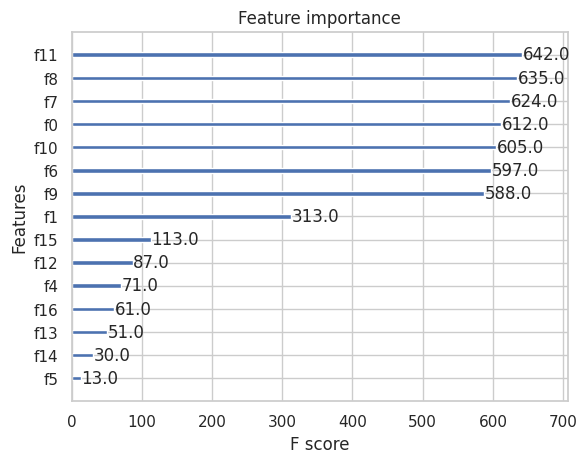

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from scipy import stats

# Load your data (replace with your actual data loading code)
# df = pd.read_csv('your_data.csv')

# Data Preparation
X = df.drop(['id', 'TenYearCHD'], axis=1)
y = df['TenYearCHD']

# Convert categorical variables (one-hot encoding)
X = pd.get_dummies(X, columns=['education', 'sex', 'is_smoking'], drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Handle missing values (using median for robustness)
for col in X_train.columns:
    if X_train[col].isnull().any():
        median_val = X_train[col].median()
        X_train[col].fillna(median_val, inplace=True)
        X_test[col].fillna(median_val, inplace=True)

# Scale numerical features (important for XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE for handling class imbalance
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# Convert to DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(X_res, label=y_res)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Set scale_pos_weight parameter (critical for imbalance)
# This is approximately the ratio of negative class to positive class
scale_pos_weight = np.sum(y == 0) / np.sum(y == 1)

# Base XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': ['aucpr', 'logloss'],  # Emphasize precision-recall
    'scale_pos_weight': scale_pos_weight,
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 1,
    'min_child_weight': 3,
    'seed': 42
}

# Train the model
model = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    early_stopping_rounds=20,
    evals=[(dtest, 'test')],
    verbose_eval=10
)

# Make predictions
y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)  # Default threshold

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("F1 Score:", f1_score(y_test, y_pred))

# Feature importance
importance = model.get_score(importance_type='weight')
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
print("\nFeature Importance:")
for feat, imp in importance[:10]:  # Top 10 features
    print(f"{feat}: {imp}")

# Plot feature importance
xgb.plot_importance(model, max_num_features=15)

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***